## Pengolahan Vertical Electrical Sounding (Plot Hasil Inversi)
Author: Annora Vandanu Erlangga

Notebook sebelumnya telah menjelaskan secara singkat prosedur inversi VES menggunakan IPI2win. Plot yang ada pada IPI2win sangat terbatas visualisasinya sehingga akan lebih baik untuk diplot ulang menggunakan Microsoft Excel atau pada notebook ini saya akan memberikan skrip untuk plotting data hasil inversi di python. 

<div align="center">
  <img src="pic1_save.png" width="400"/>
  <p><em>Gambar 1. Salinan data hasil inversi</em></p>
</div>

Langkah pertama adalah dengan menyimpan salinan data hasil inversi ke dalam file `.txt`. Hasil yang didapatkan dari IPI2win adalah nilai resistivitas asli, data observasi, dan model kalkulasi. ketiga data tersebut akan diplot ke dalam 2 kurva. Anda dapat menggunakan Spyder atau VSCode untuk plotting data. Terdapat dua versi skrip (dalam python dan python notebook) `ves_plot`. Anda dapat mengunduh file `.py` atau `.ipynb` ini untuk plot data hasil inversi.

In [11]:
# ----------------------------------------------------
# Plot hasil inversi VES dari IPI2win
# Author: Annora Vandanu Erlangga
# ----------------------------------------------------

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import os

# Ganti 'namafile.txt' dengan path ke file datamu
filename = r'D:\Kulon Progo 2025\Geolistrik\Tutorial-VES\2_Plot data\L1-usgs.txt'
plot_title = os.path.splitext(os.path.basename(filename))[0]
save_dir = os.path.dirname(filename)
model_plot_path = os.path.join(save_dir, f"{plot_title}_Model_Inversi.png")
curve_plot_path = os.path.join(save_dir, f"{plot_title}_Kurva_Kalkulasi.png")

with open(filename, 'r') as file:
    lines = file.readlines()

start_idx = None
end_idx = None
for i, line in enumerate(lines):
    if 'Model' in line:
        start_idx = i + 2  # Lewati header "D\tRo"
    if 'Field curve' in line:
        end_idx = i
        break

model_lines = lines[start_idx:end_idx]
depth = []
resistivity = []

for line in model_lines:
    parts = line.strip().split()
    if len(parts) == 2:
        d, r = parts
        try:
            depth.append(float(d))
            resistivity.append(float(r.replace(",", "")))  # hilangkan koma kalau ada
        except:
            pass  # lewati baris error

field_start = None
synthetic_start = None
for i, line in enumerate(lines):
    if 'Field curve' in line:
        field_start = i + 2  # Lewati header
    if 'Synthetic curve' in line:
        synthetic_start = i + 2
        break

ab2_obs = []
res_obs = []
for line in lines[field_start:synthetic_start - 2]:
    parts = line.strip().split()
    if len(parts) == 2:
        try:
            ab2_obs.append(float(parts[0]))
            res_obs.append(float(parts[1].replace(",", "")))
        except:
            pass

ab2_syn = []
res_syn = []
for line in lines[synthetic_start:]:
    parts = line.strip().split()
    if len(parts) == 2:
        try:
            ab2_syn.append(float(parts[0]))
            res_syn.append(float(parts[1].replace(",", "")))
        except:
            pass

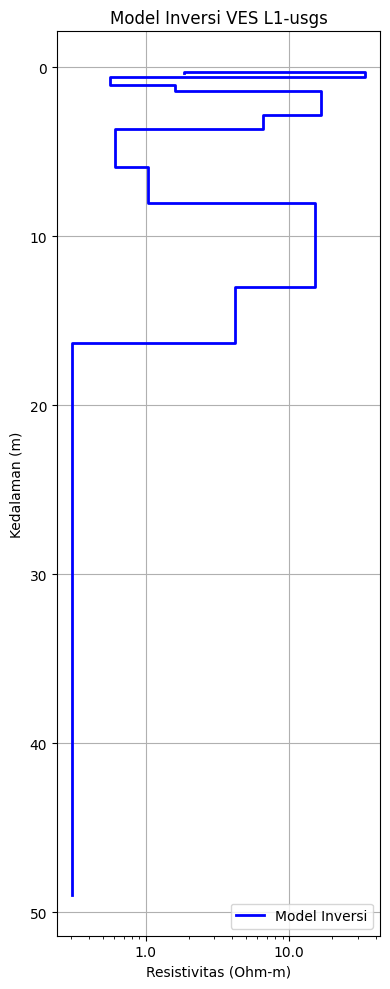

model inversi tersimpan di D:\Kulon Progo 2025\Geolistrik\Tutorial-VES\2_Plot data\L1-usgs_Model_Inversi.png


In [12]:
# ========== Plot 1: Model Inversi ==========
fig, ax = plt.subplots(figsize=(4, 10))
ax.step(resistivity, depth, where='post', color='b', linewidth=2, label='Model Inversi')
ax.set_xlabel('Resistivitas (Ohm-m)')
ax.set_ylabel('Kedalaman (m)')
ax.set_title(f'Model Inversi VES {plot_title}')
ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.invert_yaxis()
ax.grid(True)
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig(model_plot_path, transparent=True, dpi=300)
plt.show()

print(f"model inversi tersimpan di {model_plot_path}")

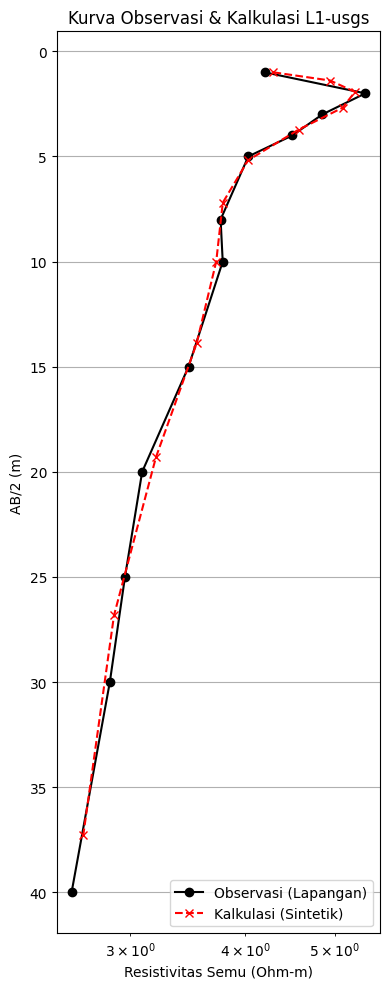

kurva kalkulasi tersimpan di D:\Kulon Progo 2025\Geolistrik\Tutorial-VES\2_Plot data\L1-usgs_Kurva_Kalkulasi.png


In [13]:
# ========== Plot 2: Kurva Lapangan vs Sintetik ==========
fig, ax = plt.subplots(figsize=(4, 10))
ax.plot(res_obs, ab2_obs, 'o-', label='Observasi (Lapangan)', color='black')
ax.plot(res_syn, ab2_syn, 'x--', label='Kalkulasi (Sintetik)', color='red')
ax.legend(loc='lower right')
ax.set_xlabel('Resistivitas Semu (Ohm-m)')
ax.set_ylabel('AB/2 (m)')
ax.set_title(f'Kurva Observasi & Kalkulasi {plot_title}')
ax.grid(True)
ax.invert_yaxis()
ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
# ax.set_yscale('log')
plt.tight_layout()
plt.savefig(curve_plot_path, transparent=True, dpi=300)
plt.show()

print(f"kurva kalkulasi tersimpan di {curve_plot_path}")

Plot hasil inversi akan otomatis tersimpan di folder yang sama dengan skrip plot.